In [41]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
import xgboost as xgb

import imp
import llama

llama = imp.reload(llama)

In [27]:
train_df, test_X = llama.load_df("./data/train.csv", "./data/test.csv")

Train DataFrame:
Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)
(76020, 371)
Test DataFrame:
Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_va

In [28]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


In [152]:
def replace_very_low_var3(df):
    pass

train_df.loc[train_df["var3"] < 0, :].head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
782,1567,-999999,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0
3361,6738,-999999,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0
4103,8225,-999999,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0
4422,8879,-999999,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0
7053,14142,-999999,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


/home/vadim/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


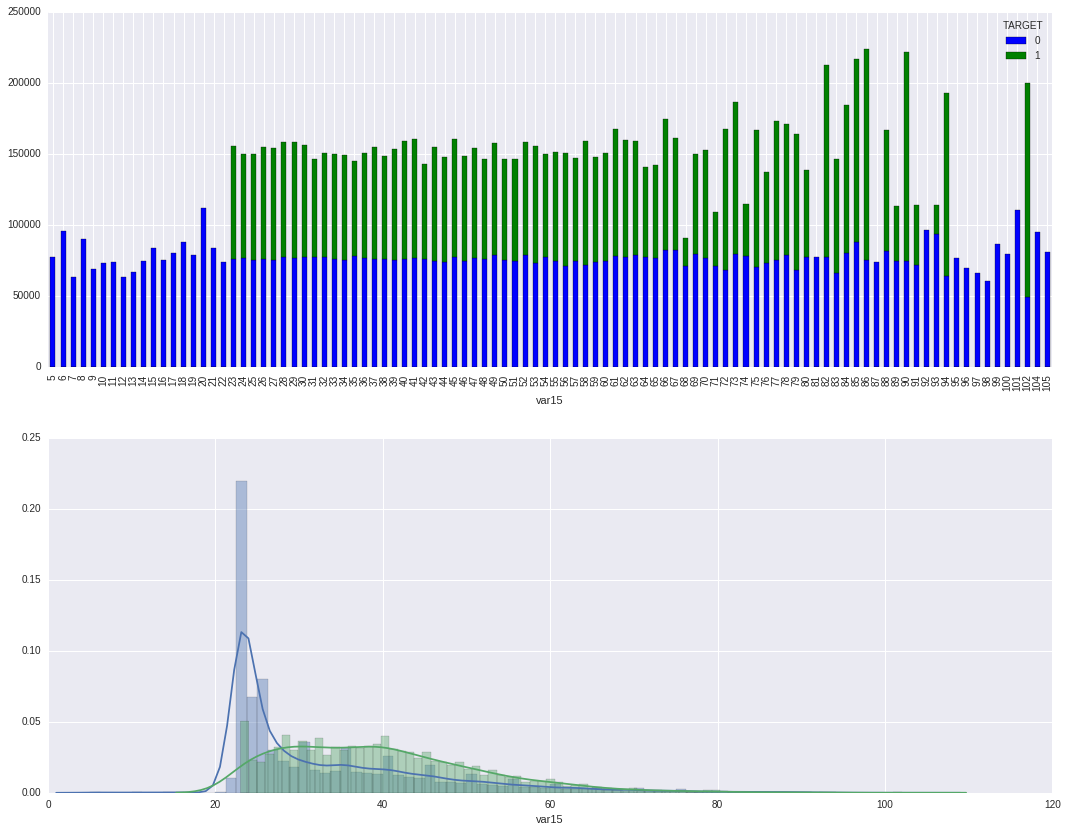

In [36]:
fig, axes = plt.subplots(ncols = 1, nrows = 2)
fig.set_size_inches(18, 14)
col = "var15"
train_df.pivot_table("ID", col, "TARGET").plot(ax = axes[0], kind = "bar", stacked = True)
sns.distplot(train_df.loc[train_df["TARGET"] == 0, col], bins = 80, ax = axes[1])
sns.distplot(train_df.loc[train_df["TARGET"] == 1, col], bins = 80, ax = axes[1])

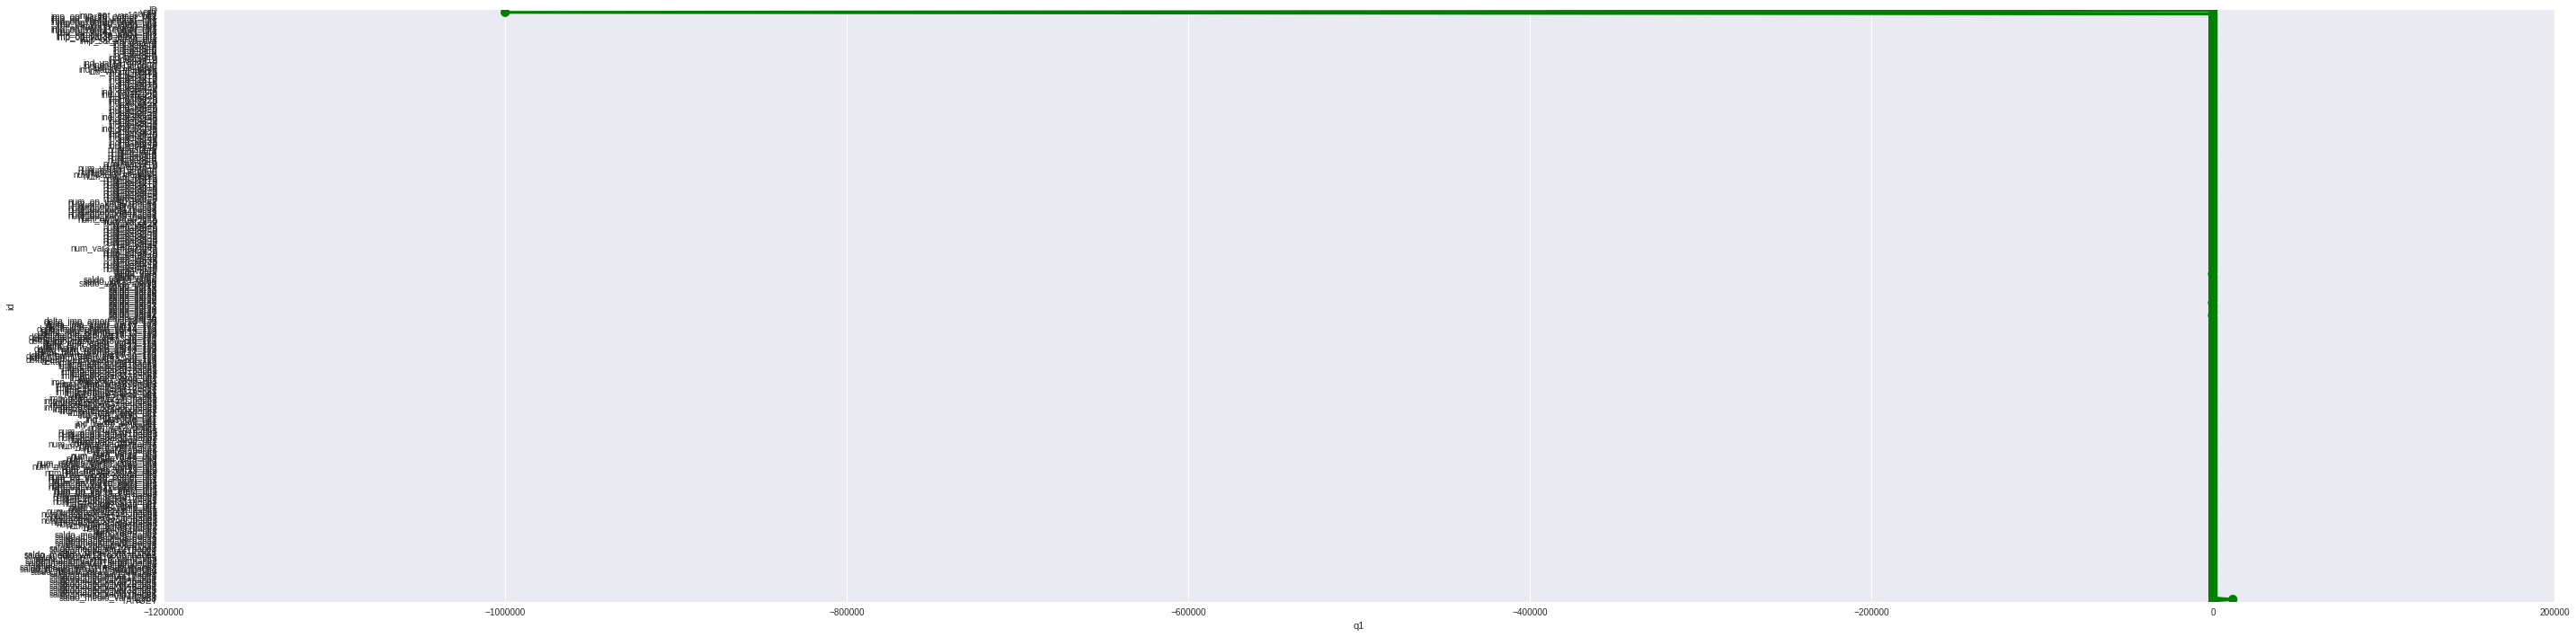

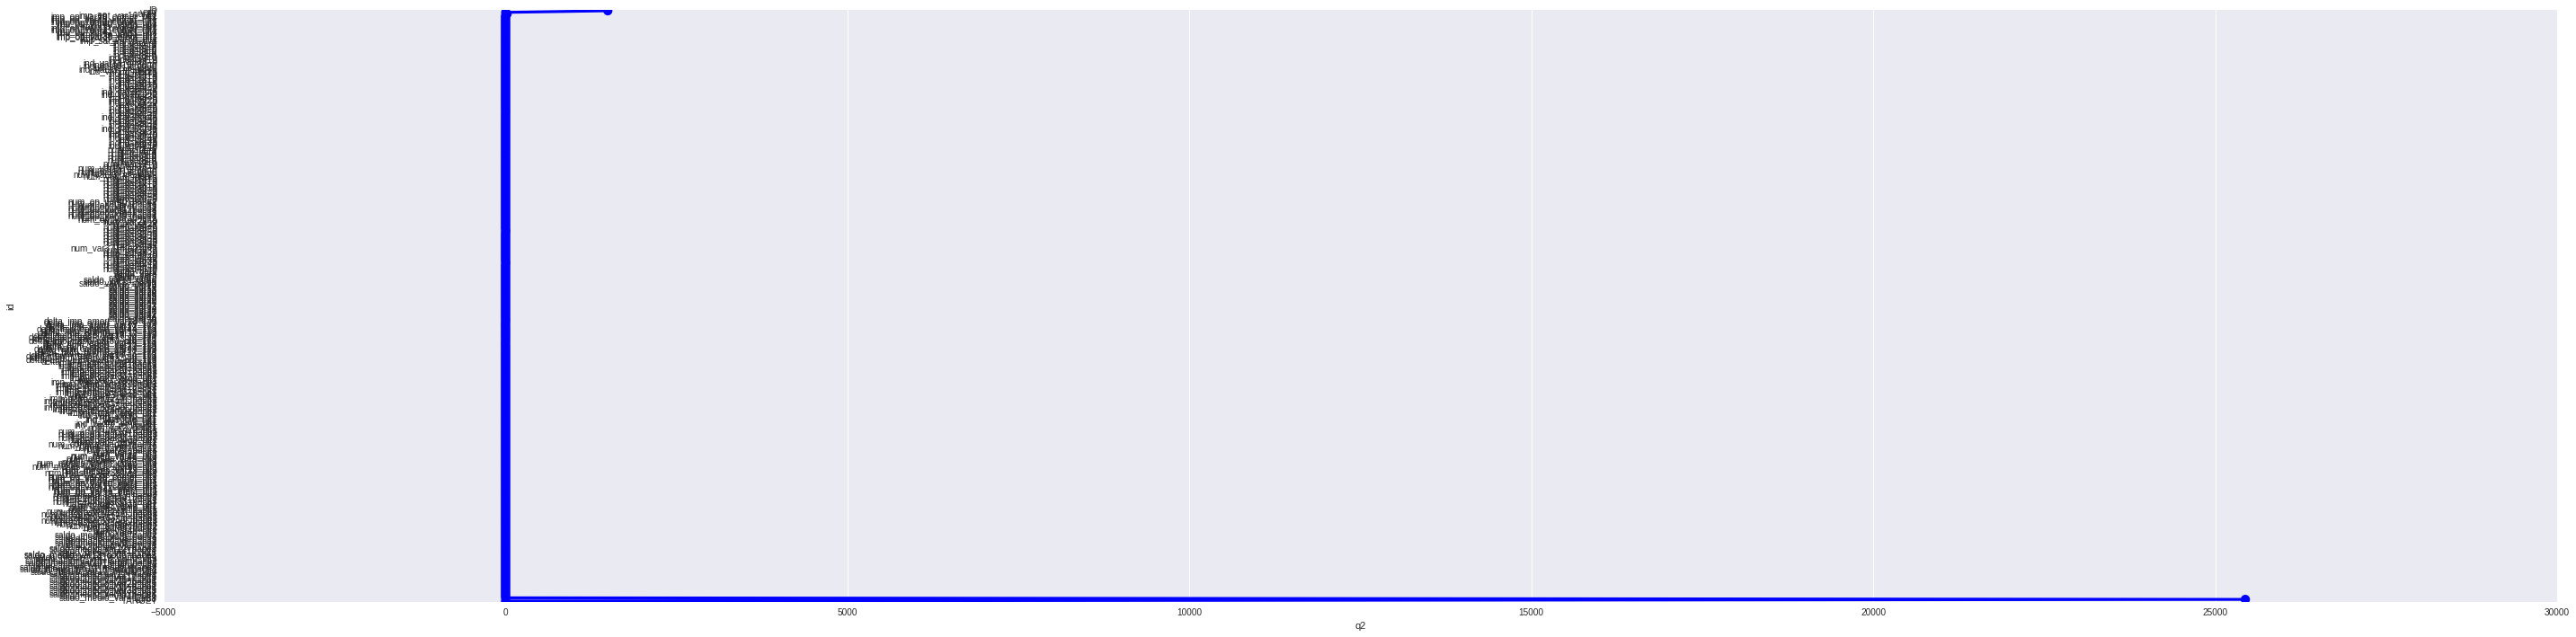

In [6]:
q1 = train_df.apply(np.percentile, axis=0, q = .025)
q2 = train_df.apply(np.percentile, axis=0, q = .975)
q_df = pd.DataFrame({"q1": q1, "q2": q2})
q_df["id"] = q_df.index
sns.factorplot(y="id", x="q1", data=q_df, size = 10, aspect = 4, color = "green")
sns.factorplot(y="id", x="q2", data=q_df, size = 10, aspect = 4, color = "blue")

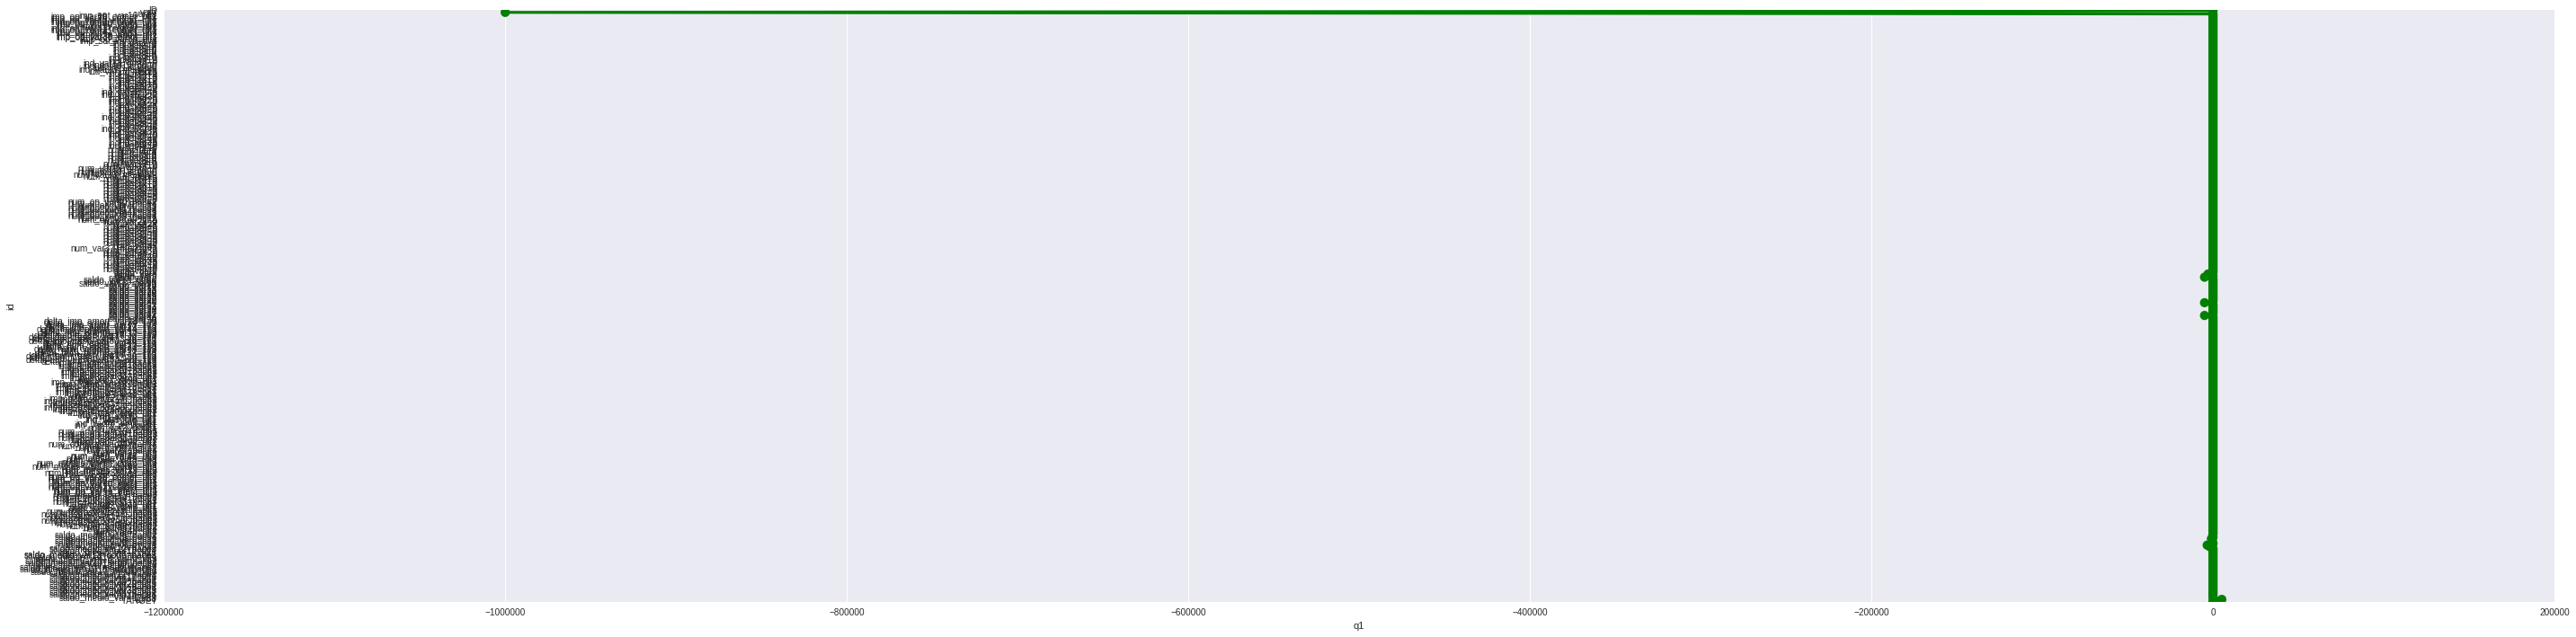

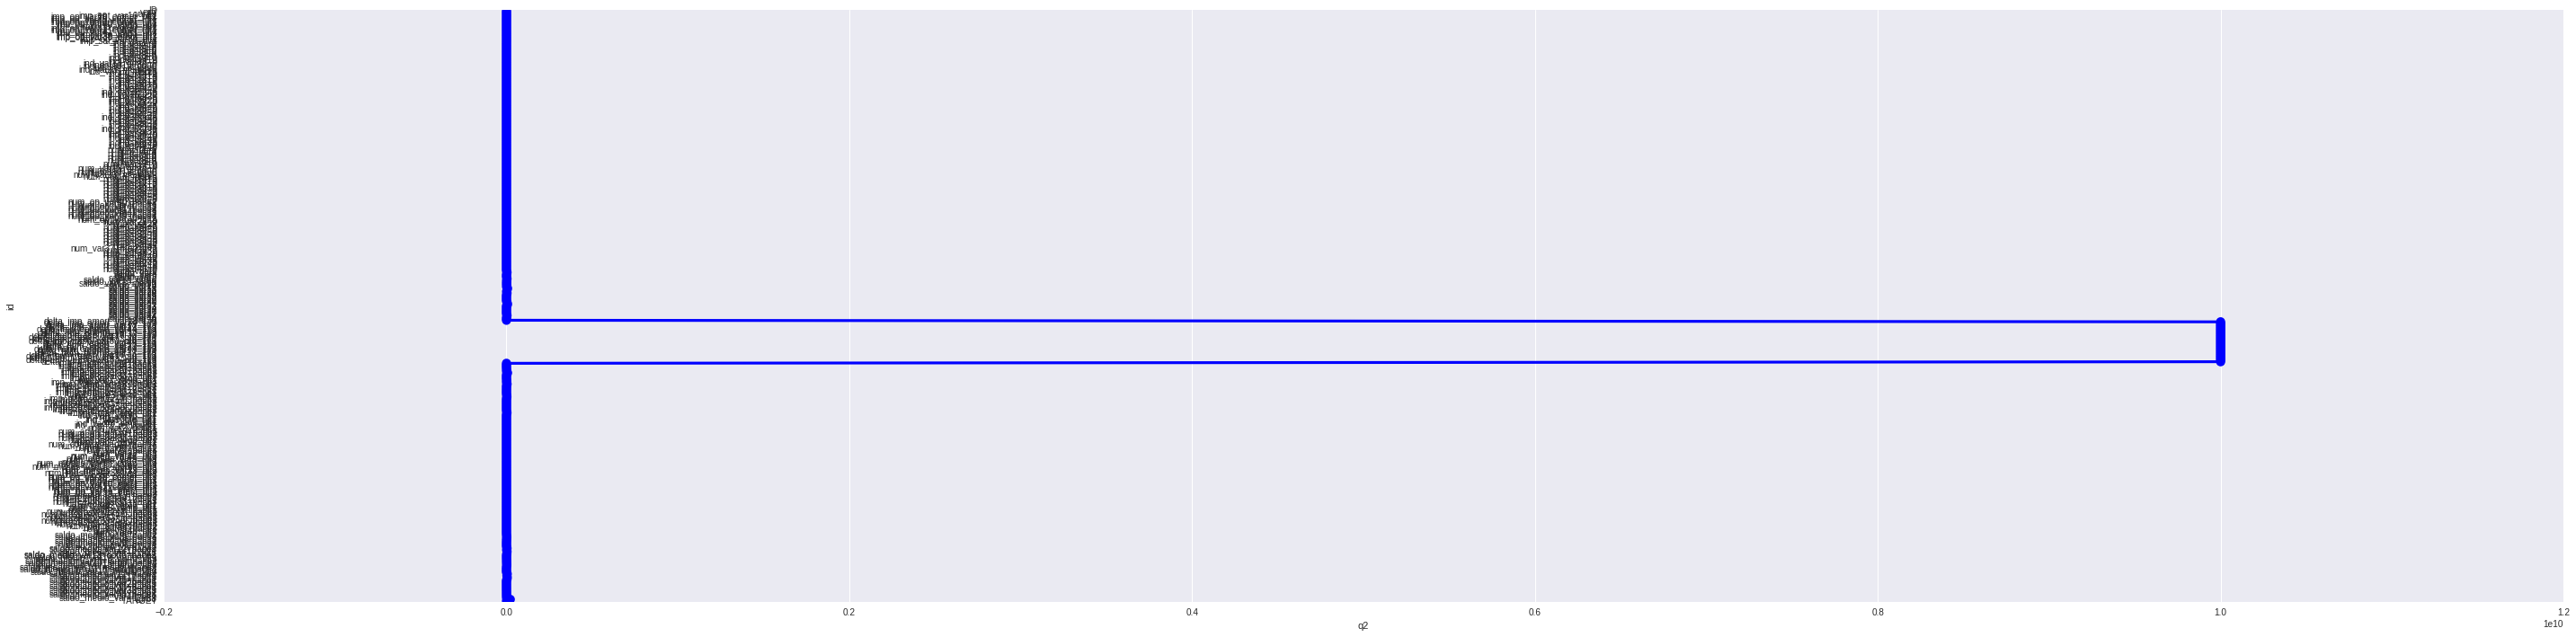

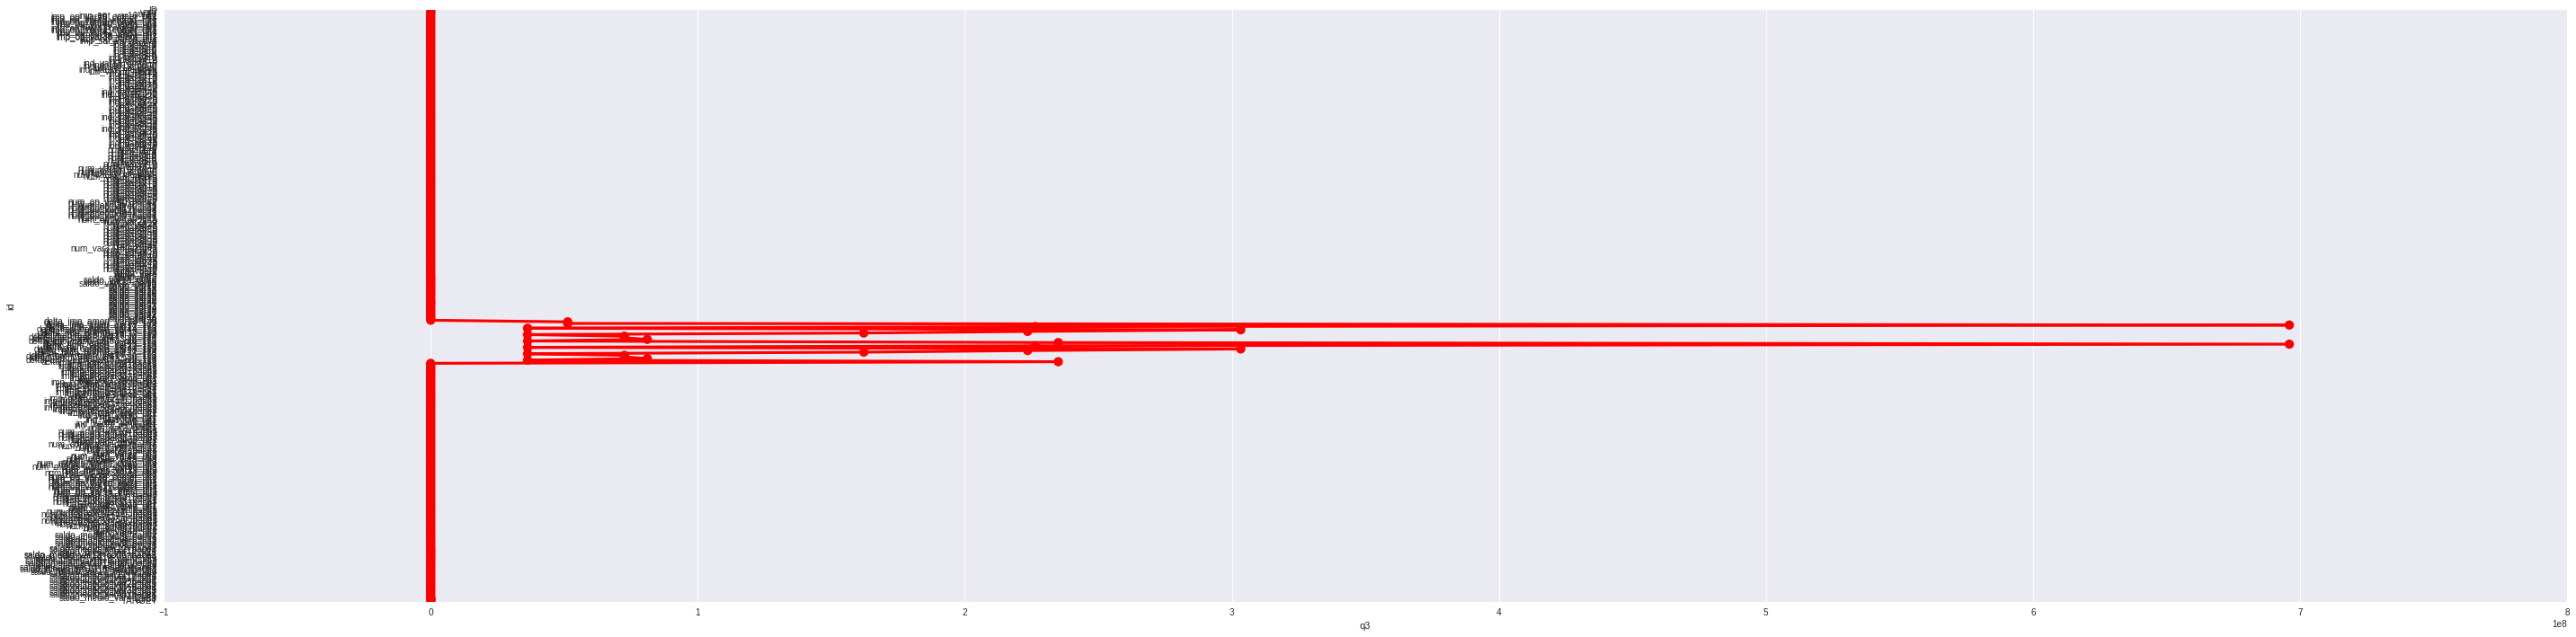

In [7]:
q1 = train_df.apply(np.min, axis=0)
q2 = train_df.apply(np.max, axis=0)
q3 = train_df.apply(np.std, axis=0)
q_df = pd.DataFrame({"q1": q1, "q2": q2, "q3": q3})
q_df["id"] = q_df.index
sns.factorplot(y="id", x="q1", data=q_df, size = 10, aspect = 4, color = "green")
sns.factorplot(y="id", x="q2", data=q_df, size = 10, aspect = 4, color = "blue")
sns.factorplot(y="id", x="q3", data=q_df, size = 10, aspect = 4, color = "red")

In [51]:
print("Q1")
print(abs(q1).sort_values().tail(25))
print("\nQ2")
print(abs(q2).sort_values().tail(25))
print("\nQ3")
print(abs(q3).sort_values().tail(25))

Q1
delta_num_aport_var13_1y3            1.00
delta_imp_aport_var17_1y3            1.00
delta_imp_venta_var44_1y3            1.00
delta_num_trasp_var33_in_1y3         1.00
delta_imp_trasp_var33_in_1y3         1.00
delta_num_reemb_var17_1y3            1.00
delta_imp_trasp_var17_in_1y3         1.00
delta_num_venta_var44_1y3            1.00
delta_imp_reemb_var17_1y3            1.00
delta_imp_compra_var44_1y3           1.00
delta_num_trasp_var17_in_1y3         1.00
var15                                5.00
saldo_medio_var5_hace3               8.04
saldo_medio_var5_hace2             128.37
saldo_medio_var8_hace2             287.67
saldo_medio_var5_ult3              476.07
saldo_medio_var5_ult1              922.38
saldo_medio_var8_ult3             1844.52
saldo_var5                        2895.72
saldo_medio_var8_ult1             3401.34
saldo_var8                        4942.26
saldo_var42                       4942.26
saldo_var30                       4942.26
var38                          

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c1214ae10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2c12802f98>], dtype=object)

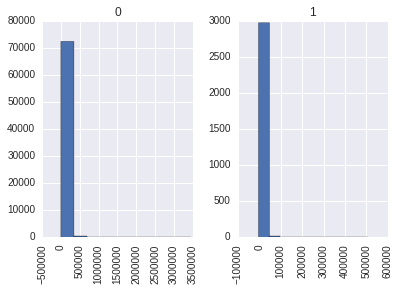

In [54]:
train_df.hist("saldo_var30", "TARGET")

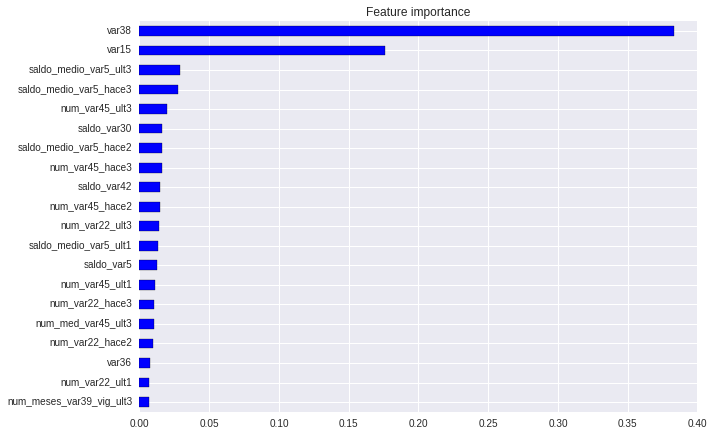

In [35]:
train_X, train_y = llama.split_train_set(train_df.drop("ID", 1), "TARGET")
llama.feature_importance(train_X, train_y)

In [39]:
cv_fold = StratifiedKFold(train_y, n_folds = 5, shuffle = True)

In [49]:
# clf = ExtraTreesClassifier(n_estimators=2000, n_jobs = 4)
clf = xgb.XGBClassifier(max_depth=5, 
                        n_estimators=350, 
                        learning_rate=0.03, 
                        nthread=4, 
                        subsample=0.95, 
                        colsample_bytree=0.85)
cross_val_score(clf, train_X, train_y, "roc_auc", cv_fold, n_jobs=2)

array([ 0.83432391,  0.84518757,  0.84005712,  0.82846833,  0.84761376])

In [50]:
clf.set_params(nthread = 8)
clf.fit(train_X, train_y)
pred = clf.predict_proba(test_X.drop("ID", 1))
pred_df = pd.DataFrame({"ID": test_df.ID, "TARGET": pred[:,1]})
pred_df.to_csv("submission.csv", index = False)

In [ ]:
"""
ExtraTreesClassifier(n_estimators=2000, n_jobs = 4)
array([ 0.78135125,  0.78413756,  0.77074728,  0.76621595,  0.77887001])

xgb_clf = xgb.XGBClassifier(max_depth=2, n_estimators=1000, learning_rate=0.05, nthread=7)
array([ 0.84455681,  0.84528062,  0.82965851,  0.83049845,  0.83485219])

array([ 0.81927677,  0.82930463,  0.83174602,  0.81887889,  0.83420262])

array([ 0.82550421,  0.83947742,  0.83664852,  0.82592275,  0.84212628])

clf = xgb.XGBClassifier(max_depth=5, 
                        n_estimators=350, 
                        learning_rate=0.03, 
                        nthread=4, 
                        subsample=0.95, 
                        colsample_bytree=0.85)
array([ 0.83432391,  0.84518757,  0.84005712,  0.82846833,  0.84761376])
"""